In [3]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import re, nltk
from konlpy.tag import Okt

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import os

notepad = os.environ['WINDIR']+'\\system32\\notepad.exe'
driver_name =  os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\downloads\\chromedriver.exe'

sword = '어린이날 선물'
nurl = 'https://kin.naver.com/search/list.naver?query=' + sword
driver = webdriver.Chrome(driver_name)


In [4]:
def get_total_page(cnt):
    if cnt > 100:
        return 10
    else:
        return int(cnt // 10) 

In [6]:
driver.get(nurl)
time.sleep(2)

urls = driver.find_elements(By.CLASS_NAME, '_searchListTitleAnchor')
print(len(urls))

# 전체 지식in 조회 수
cnt = int(driver.find_element(By.CLASS_NAME, 'number').text.strip('()').split('/')[-1].replace(',',''))
total_page = get_total_page(cnt)
print(total_page)

# test 1Page
# total_page = 0

url_list = []
npage = 1
while True:

    for url in urls:
        url_list.append(url.find_element(By.XPATH, '//*[@id="s_content"]/div[3]/ul/li[9]/dl/dt/a').get_attribute('href'))

        
        # href = url.find_element(By.TAG_NAME, 'dl')
        # # 답변수
        # hit = int(href.find_element(By.CLASS_NAME, 'hit').text.split()[-1].strip())

        # href = href.find_element(By.TAG_NAME, 'a')
        # # 제목
        # title = href.text
        # # 답변 URL
        # uurl = href.get_attribute('href')
        
        # url_list.append({'제목':title, 'URL': uurl, '답변수':hit})

    if npage >= total_page:
        break

    driver.find_element(By.XPATH, f'//*[@id="s_content"]/div[3]/div[2]/a[{npage}]').click()
    time.sleep(2)

    urls = driver.find_elements(By.XPATH, '//*[@id="s_content"]/div[3]/ul/li')
    npage += 1

# driver.close()

# df = pd.DataFrame(url_list)
# df.head()


10
10


In [7]:
print(len(url_list))

100


In [8]:
with open(f'data/{sword}.txt', 'w', encoding='utf-8') as f:

    for index in url_list:
        
        driver.get(index)
        time.sleep(2)
        
        # 답변수 
        #print('답변수')
        hit = int(driver.find_element(By.CLASS_NAME, '_answerCount.num').text.strip()) - 1

        for i in range((hit//5)):

            try: 
                driver.find_element(By.ID, 'nextPageButton').click()
                time.sleep(2)
            except:
                continue

        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # 답변 목록
        answer_list = soup.select('.answer-content__item._contentWrap._answer')

        # 글씨만 추출
        for answer in answer_list:
            texts = answer.select('.se-module.se-module-text > p')
            
            # 글씨만 파일로 저장
            # p태그별로 
            for text in texts:
                f.write(text.get_text() + '\n')
    
    
driver.close()

In [9]:
with open(f'data/{sword}.txt') as f:
    text = f.read()

In [10]:
okt = Okt()
tokens = okt.nouns(text)     # 문장에서 명사 추출
tokens[:10]

['어린이', '날', '선물', '것', '아래', '것', '추천', '책', '아이', '독서']

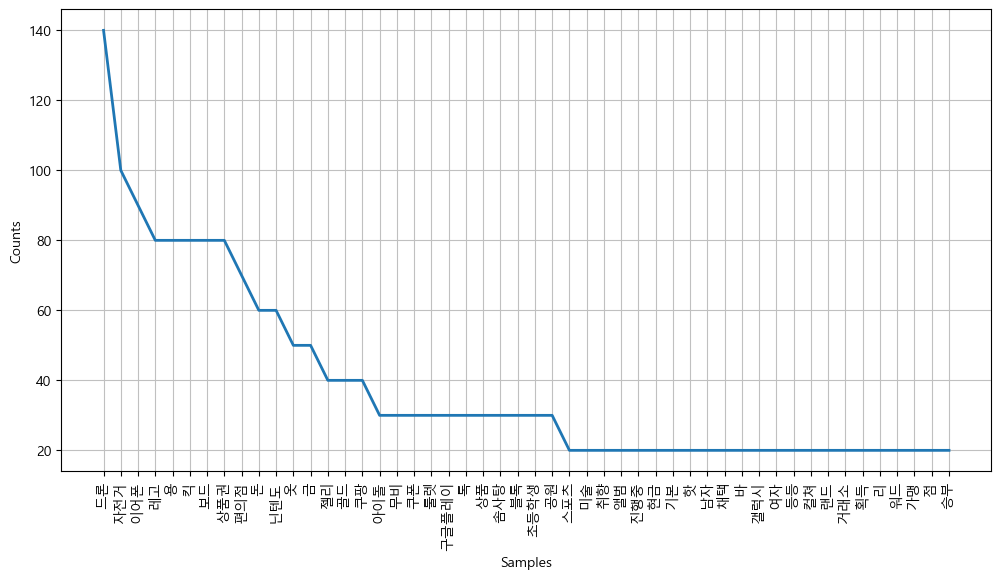

In [23]:
gift = nltk.Text(tokens, name='어린이날선물')
plt.figure(figsize=(12,6))
gift.plot(50)
plt.show()


In [22]:
stoptext = """
    추천 선물 수 아이 포인트 어린이날 출석 등 적립 체크 가입 코드 제품 코인 사용 것 이 
    페이 시 보기 캐시 네이버 교환 요 무선 가요 도움 매일 가능 가격 바로 스 저 걷기
    검증 앱 테크 친구 미션 어린이 게임 활동 닥터 퀴즈 자동 기능 용품 참고 모두 요즘 피 규어
    방문 국내 현금화 부업 입력 파트너 정액 수수료 생각 촬영 운동 취미 시간 거 프로 하루
    업 상장 참여 이벤트 스토어 행운 클릭 동해 아주 방치 보 모드 제공 일환 또한 접이식 아래
    게임기 전 템 질문 할인 정도 정품 비트 빗썸 때 초대 최대 나 건강 정답 처 가지 더 여기 
    놀이 인테리어 날 사이즈 정보 나이 인기 확인 배송 버즈 한번 안 필수 구입 해도 후 혜택
    설문조사 어플 링크 하나 먼저 설치 무료 회원 답변 개 카카오 통해 록 정원 문화 지급 
    화면 슈퍼 워 수도 생활 고민 발달 블독 최고 포스팅 부담 집중 달라 스위치 장난감 날씨 미니
    디자인 입문 취급 독 전원 결정 예 재미 각 여자아이 대별 가기 이면 무조건 뭐 후드 캉골 촉감
    다운 로 컬러 크게
"""

stop_words = stoptext.split()
tokens = [word for word in tokens if word not in stop_words]
tokens[:10]

['책', '독서', '습관', '스포츠', '미술', '악기', '즐거움', '줄', '보드게임', '비디오']

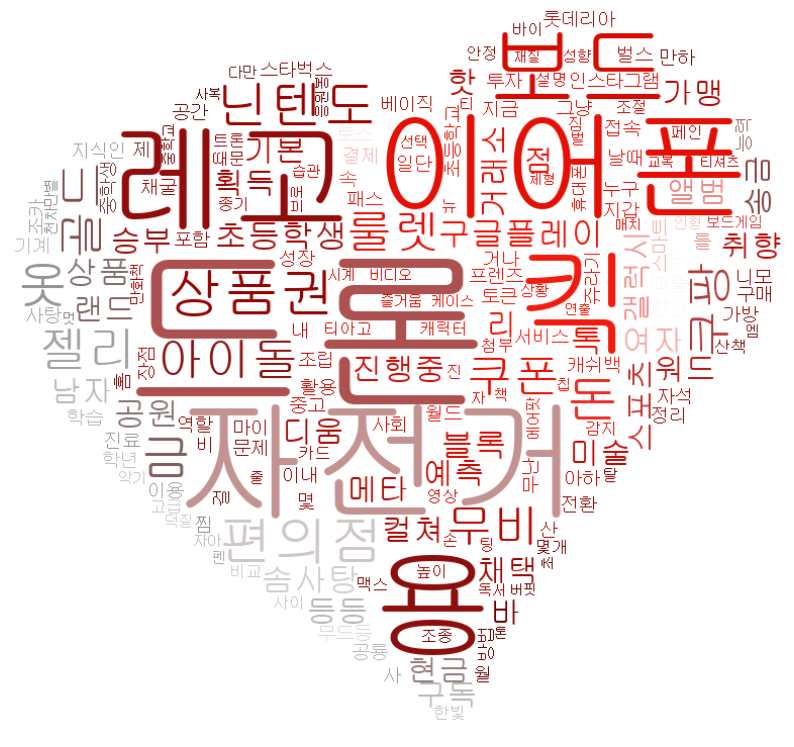

In [25]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF',
    relative_scaling=0.2,
    mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
# plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
